In [1]:
# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from collections import Counter
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier, StackingClassifier)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

# Display all columns
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 999.5 KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [20]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [21]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

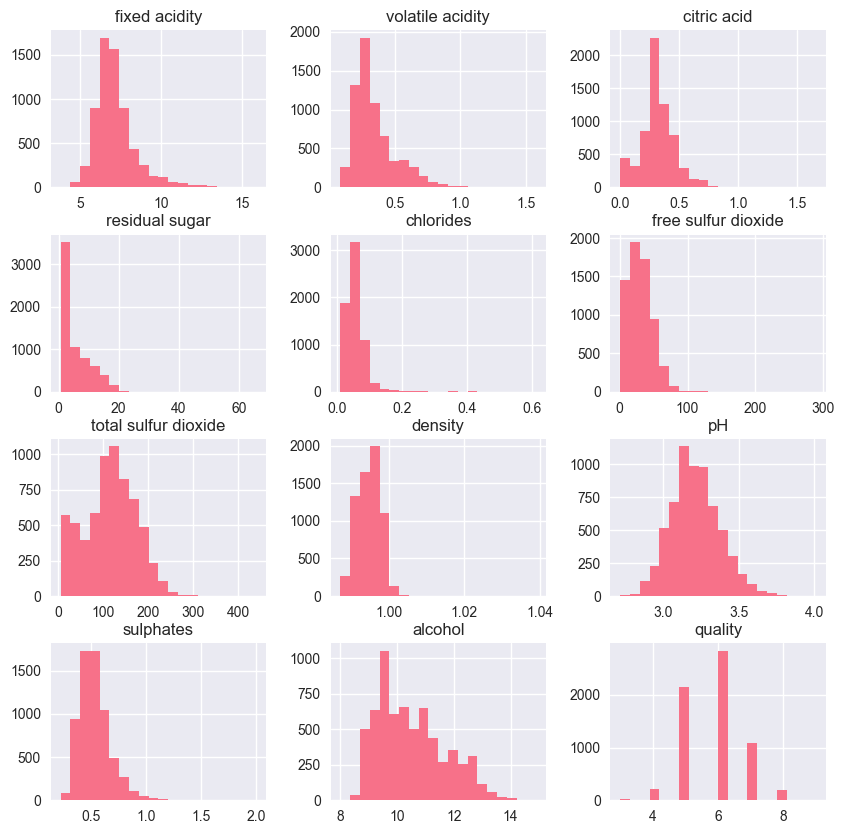

In [22]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

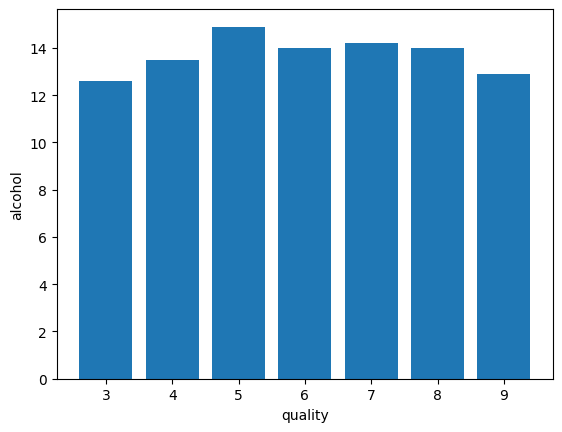

In [8]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [23]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


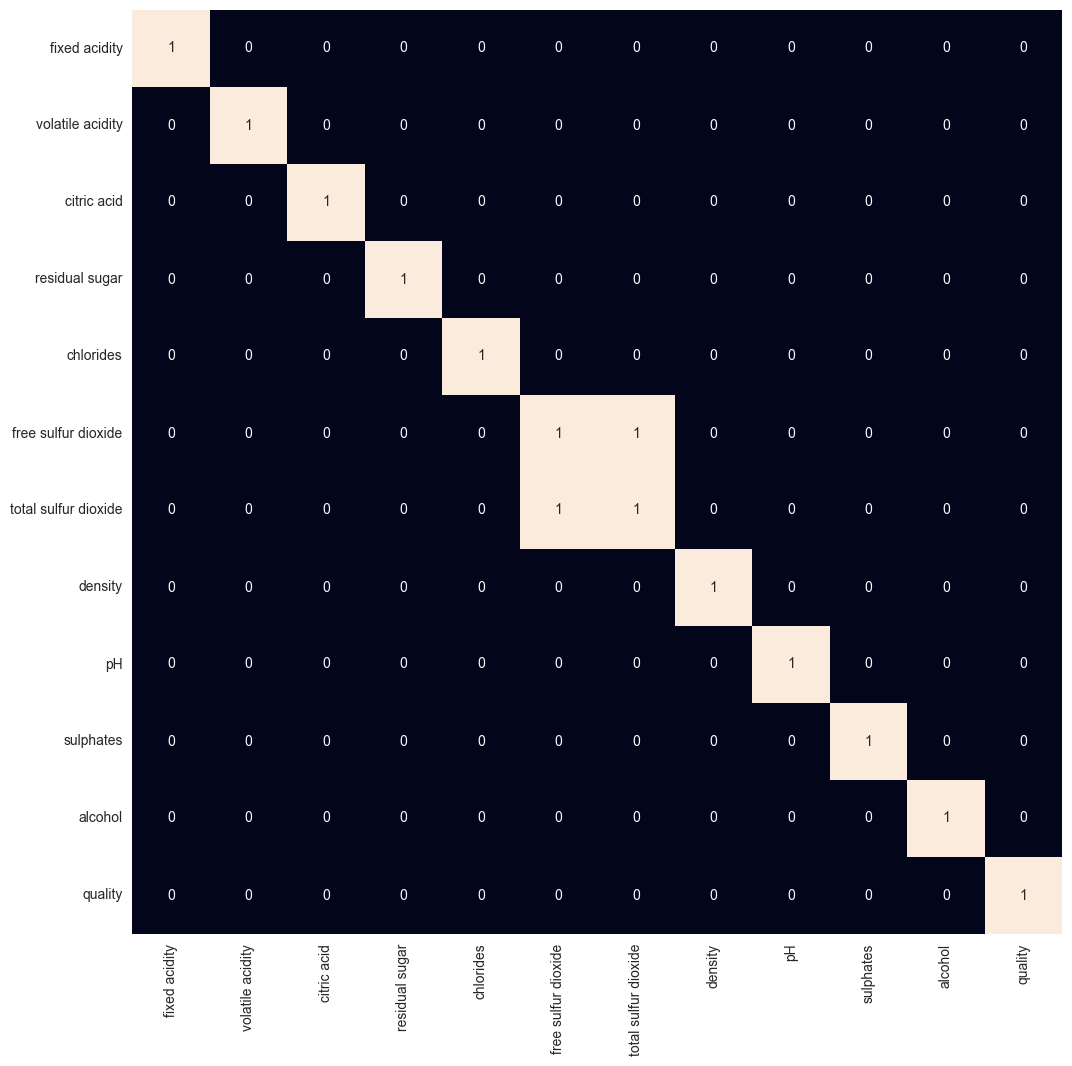

In [25]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True) > 0.7, annot=True, cbar=False)
plt.show()

In [ ]:
# Convert 'object' columns to numerical if they represent numbers
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [26]:
df = df.drop('total sulfur dioxide', axis=1)

In [27]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [28]:
df.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1


In [34]:
df.rename(columns={'wie_type':'wine_type'}, inplace=True)

In [37]:
df.columns

Index(['wine_type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'best quality'], dtype='object')

In [40]:
df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 
                  'citric acid':'citric_acid', 'residual sugar':'residual_sugar', 
                  'free sulfur dioxide':'free_sulfur_dioxide', 'best quality':'best_quality'}, inplace=True)

In [41]:
df.isna().sum()

wine_type              0
fixed_acidity          0
volatile_acidity       0
citric_acid            0
residual_sugar         0
chlorides              0
free_sulfur_dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
best_quality           0
dtype: int64

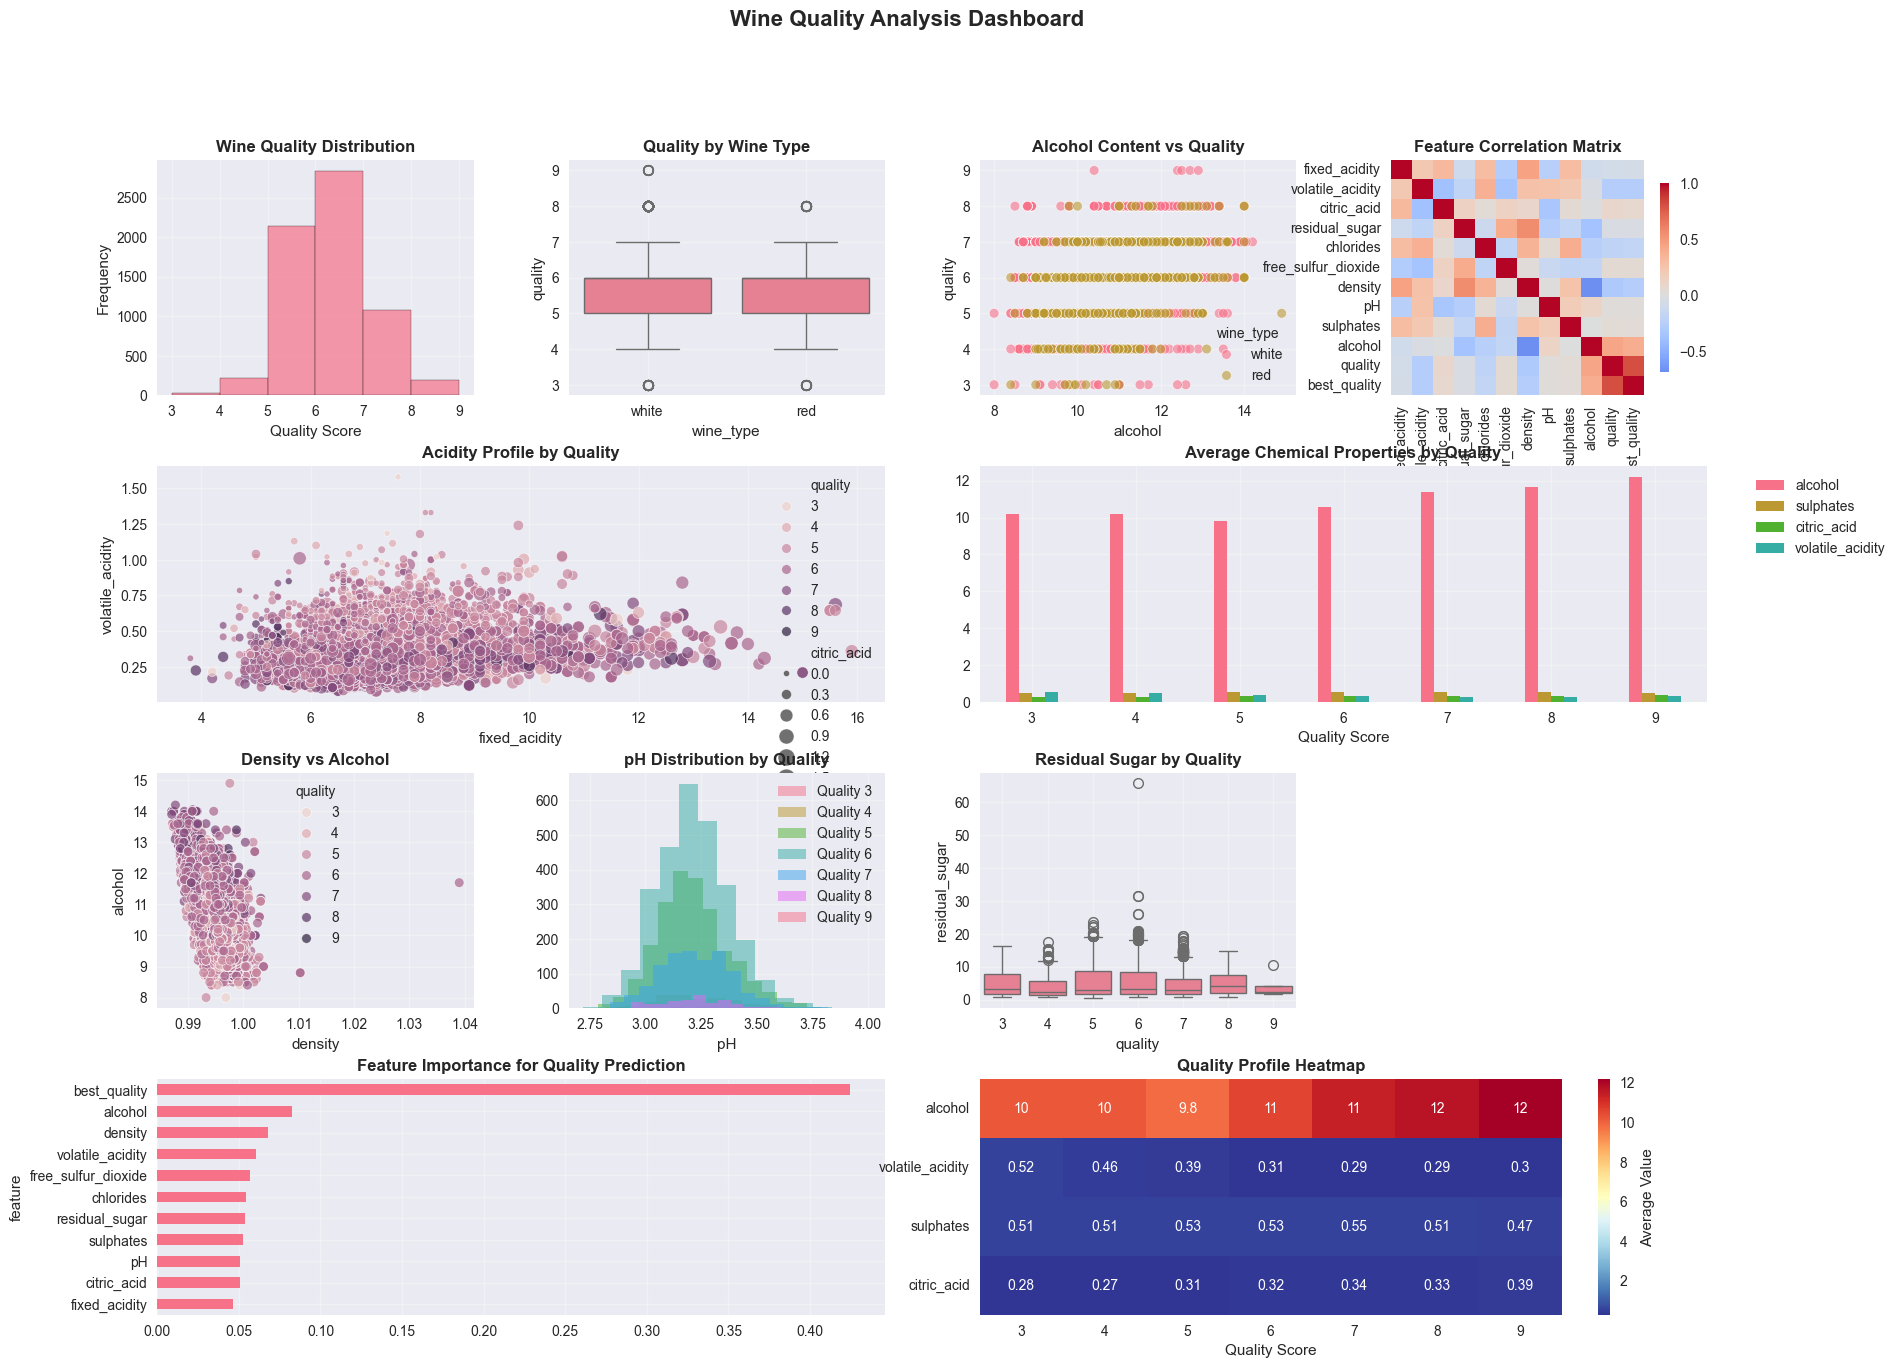

Wine Quality Dataset Summary:
Total samples: 6497
Quality range: 3 - 9
Average quality: 5.82
Red wines: 0
White wines: 0

Quality Distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

Top Correlations with Quality:
best_quality: 0.814
alcohol: 0.444
density: 0.306
volatile_acidity: 0.266
chlorides: 0.201


In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create comprehensive visualization
def create_wine_quality_dashboard():
    """Create a comprehensive wine quality visualization dashboard"""
    
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
    
    # 1. Quality Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    df['quality'].hist(bins=range(3, 10), alpha=0.7, edgecolor='black')
    ax1.set_title('Wine Quality Distribution', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Quality Score')
    ax1.set_ylabel('Frequency')
    ax1.grid(True, alpha=0.3)
    
    # 2. Quality by Wine Type
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(data=df, x='wine_type', y='quality', ax=ax2)
    ax2.set_title('Quality by Wine Type', fontweight='bold', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # 3. Alcohol vs Quality
    ax3 = fig.add_subplot(gs[0, 2])
    sns.scatterplot(data=df, x='alcohol', y='quality', hue='wine_type', alpha=0.6, ax=ax3)
    ax3.set_title('Alcohol Content vs Quality', fontweight='bold', fontsize=12)
    ax3.grid(True, alpha=0.3)
    
    # 4. Correlation Heatmap
    ax4 = fig.add_subplot(gs[0, 3])
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, ax=ax4, cbar_kws={'shrink': 0.8})
    ax4.set_title('Feature Correlation Matrix', fontweight='bold', fontsize=12)
    
    # 5. Acidity Analysis
    ax5 = fig.add_subplot(gs[1, :2])
    sns.scatterplot(data=df, x='fixed_acidity', y='volatile_acidity', 
                   hue='quality', size='citric_acid', sizes=(20, 200), alpha=0.7, ax=ax5)
    ax5.set_title('Acidity Profile by Quality', fontweight='bold', fontsize=12)
    ax5.grid(True, alpha=0.3)
    
    # 6. Chemical Properties by Quality
    ax6 = fig.add_subplot(gs[1, 2:])
    quality_stats = df.groupby('quality')[['alcohol', 'sulphates', 'citric_acid', 'volatile_acidity']].mean()
    quality_stats.plot(kind='bar', ax=ax6, rot=0)
    ax6.set_title('Average Chemical Properties by Quality', fontweight='bold', fontsize=12)
    ax6.set_xlabel('Quality Score')
    ax6.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax6.grid(True, alpha=0.3)
    
    # 7. Density vs Alcohol
    ax7 = fig.add_subplot(gs[2, 0])
    sns.scatterplot(data=df, x='density', y='alcohol', hue='quality', alpha=0.7, ax=ax7)
    ax7.set_title('Density vs Alcohol', fontweight='bold', fontsize=12)
    ax7.grid(True, alpha=0.3)
    
    # 8. pH Distribution by Quality
    ax8 = fig.add_subplot(gs[2, 1])
    for quality in sorted(df['quality'].unique()):
        subset = df[df['quality'] == quality]
        ax8.hist(subset['pH'], alpha=0.5, label=f'Quality {int(quality)}', bins=15)
    ax8.set_title('pH Distribution by Quality', fontweight='bold', fontsize=12)
    ax8.set_xlabel('pH')
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    
    # 9. Sugar Content Analysis
    ax9 = fig.add_subplot(gs[2, 2])
    sns.boxplot(data=df, x='quality', y='residual_sugar', ax=ax9)
    ax9.set_title('Residual Sugar by Quality', fontweight='bold', fontsize=12)
    ax9.set_xticklabels([f'{int(x)}' for x in sorted(df['quality'].unique())])
    ax9.grid(True, alpha=0.3)

    '''
    # 10. Sulfur Dioxide Analysis
    ax10 = fig.add_subplot(gs[2, 3])
    sns.scatterplot(data=df, x='free_sulfur_dioxide', y='total_sulfur_dioxide', 
                   hue='quality', alpha=0.7, ax=ax10)
    ax10.set_title('Sulfur Dioxide Relationship', fontweight='bold', fontsize=12)
    ax10.grid(True, alpha=0.3)
    ''' 
    
    # 11. Feature Importance (using Random Forest)
    ax11 = fig.add_subplot(gs[3, :2])
    X = df[numeric_cols].drop('quality', axis=1)
    y = df['quality']
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=True)
    
    importance_df.plot(x='feature', y='importance', kind='barh', ax=ax11, legend=False)
    ax11.set_title('Feature Importance for Quality Prediction', fontweight='bold', fontsize=12)
    ax11.grid(True, alpha=0.3)
    
    # 12. Quality Statistics Summary
    ax12 = fig.add_subplot(gs[3, 2:])
    quality_summary = df.groupby('quality').agg({
        'alcohol': 'mean',
        'volatile_acidity': 'mean',
        'sulphates': 'mean',
        'citric_acid': 'mean'
    }).round(3)
    
    # Create a heatmap of the summary statistics
    sns.heatmap(quality_summary.T, annot=True, cmap='RdYlBu_r', ax=ax12, 
                cbar_kws={'label': 'Average Value'})
    ax12.set_title('Quality Profile Heatmap', fontweight='bold', fontsize=12)
    ax12.set_xlabel('Quality Score')
    
    plt.suptitle('Wine Quality Analysis Dashboard', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    return fig

# Generate and display the dashboard
dashboard_fig = create_wine_quality_dashboard()
plt.show()

# Print summary statistics
print("Wine Quality Dataset Summary:")
print("=" * 127)
print(f"Total samples: {len(df)}")
print(f"Quality range: {df['quality'].min():.0f} - {df['quality'].max():.0f}")
print(f"Average quality: {df['quality'].mean():.2f}")
print(f"Red wines: {len(df[df['wine_type'] == 'Red'])}")
print(f"White wines: {len(df[df['wine_type'] == 'White'])}")

print("\nQuality Distribution:")
print(df['quality'].value_counts().sort_index())

print("\nTop Correlations with Quality:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['quality'].abs().sort_values(ascending=False)
for feature, corr in correlations[1:6].items():  # Top 5 excluding quality itself
    print(f"{feature}: {corr:.3f}")

In [45]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [47]:
#features = features.fillna(features.mean())
features = df.drop(['quality', 'best_quality'], axis=1)
target = df['best_quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

# Impute missing values after splitting
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [48]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [52]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
	models[i].fit(xtrain, ytrain)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
	print('Validation Accuracy : ', metrics.roc_auc_score(
		ytest, models[i].predict(xtest)))
print()

LogisticRegression() : 
Training Accuracy :  0.7027810651830071
Validation Accuracy :  0.6949995402580684
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9735567052182403
Validation Accuracy :  0.8050515421787681
SVC() : 
Training Accuracy :  0.7069199304892986
Va

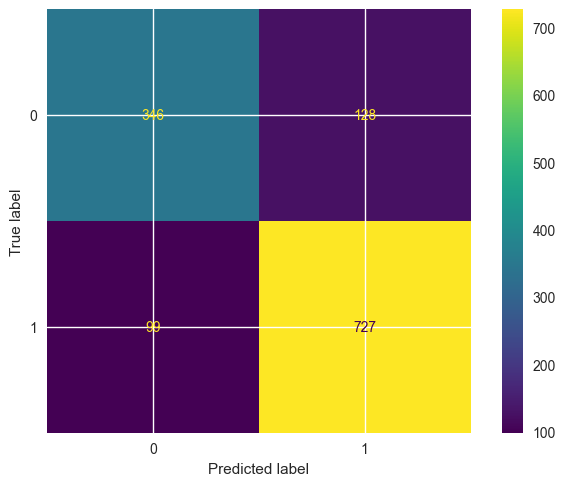

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'models[1]' is your trained classifier
cm = confusion_matrix(ytest, models[1].predict(xtest))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[1].classes_) # Assuming your model has a 'classes_' attribute
disp.plot()
plt.show()

In [54]:
print(metrics.classification_report(ytest, models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       474
           1       0.85      0.88      0.86       826

    accuracy                           0.83      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.82      0.83      0.82      1300

